In [7]:
import pickle

import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from utils import preprocess_data
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [8]:
with open("../models/decision_tree.pkl", "rb") as f:
    decision_tree = pickle.load(f)

with open("../models/naive_bayes.pkl", "rb") as f:
    naive_bayes = pickle.load(f)

cnn = load_model("../models/cnn.h5")
lstm = load_model("../models/lstm.h5")
bilstm = load_model("../models/bilstm.h5")

155/155 [==============================] - 8s 46ms/step


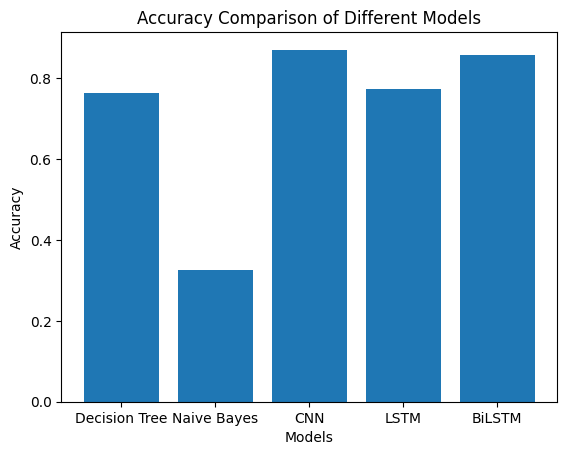

In [9]:
data = pd.read_csv("../labeled_data.csv")
text, labels, vocab_size = preprocess_data(data)

X_train, X_test, y_train, y_test = train_test_split(
    text, labels, test_size=0.2, random_state=42
)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

num_classes = len(set(labels))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_naive_bayes = naive_bayes.predict(X_test)
y_pred_cnn = np.argmax(cnn.predict(X_test), axis=1)
y_pred_lstm = np.argmax(lstm.predict(X_test), axis=1)
y_pred_bilstm = np.argmax(bilstm.predict(X_test), axis=1)

# Plotting the accuracy of each model in a bar chart
models = ["Decision Tree", "Naive Bayes", "CNN", "LSTM", "BiLSTM"]
accuracies = [
    accuracy_score(y_test, y_pred_decision_tree),
    accuracy_score(y_test, y_pred_naive_bayes),
    accuracy_score(y_test, y_pred_cnn),
    accuracy_score(y_test, y_pred_lstm),
    accuracy_score(y_test, y_pred_bilstm),
]

plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.show()